**PySDS Week 2 Lecture 1. V.1 **
Last author: B. Hogan

Week 2. Day 2. Text processing and file input output. 
=====================================================

Please note, that today you will want to work with some files that have been presented for you in the file (under supplementary files), ```PySDS_Week02_Day02_fileWork.zip```.  

Unzip this file into the same directory as your ipynb files unless you want to change the file paths in the examples below. 

# Section 1. Introduction to File types 

For each of the following file types, we will have a bit of a summary of the file type, it's relevance and it's structure. Then we will discuss about how to get the file type into and out of a DataFrame. 

## JSON 

JavaScript Object Notation [JSON] is one of the most popular forms for data transport. This is partially because it is easy in javascript to export data to this format. It is also partialy because it is very lightweight. By using only brackets, quotes and braces, you can structure most of the data. 

Javascript looks very similar to python lists and dictionaries. In fact, I'm at a loss to think of a difference off hand. That being said, it is not advised to build your own json parser when python has one built in. 

As json is just lists and dicts it stands to reason that it could be human readable. If you will notice from looking at json on the web, it does not usually include whitespace. Yet, programs can often 'pretty print' the whitespace or better, turn the json automatically into a hierarchical structure to browse. On different browsers, try going to:
~~~
https://www.reddit.com/.json 
~~~
All of reddit's pages can be formatted as json. This makes them available to third party app providers. That being said, only some pages are accessible. Without proper authentication, you cannot view a user's private account details. But otherwise, by placing .json at the end of a reddit page and before the arguments, you can access it for later analysis.  

You can load json data with: 
~~~
import json

datastructure = json.loads(<The_Data>)
~~~

Then you can just query it as a series of nested lists and dictionaries. You can also print this data in a nice readable format (called pretty printing) in the following way: 

~~~
json.dumps(THE_DATA, indent=4) 
~~~

There are other ways to pretty print. Let's look at json from Reddit pretty printed. Open a browser window and head to:

https://jsonformatter.curiousconcept.com 

In there type: 

http://reddit.com/r/aww.json 

Notice how you can collapse and expand the json file. We will use this to navigate through the file then download it for processing. 
Json needs to be imported otherwise python will not recognize the commands. In python 2.* json was not fully implemented and people often had to go to the django package for a robust json parser. In python 3 we typically use the base package (```import json```). 

In [91]:
# loading in json 
import json

filein = json.loads(open("muppetEpisodes.json").read())
print(type(filein))
print(len(filein))
print(len(filein['data']))

<class 'dict'>
2
100


In [92]:
# dumping data to json. 

fileout = open("muppetEpisodes_prettyPrinted.json",'w')
fileout.write(json.dumps(filein,indent=4)) 
fileout.close()

# Now let's open that file in a text editor to see what's up. 
# Also try opening it in your browser! 

In [93]:
# My favorite part: json.normalize
import json

filein = json.loads(open("muppetEpisodes.json").read())
muppet_table = json_normalize(filein["data"])
display(muppet_table.head())

,absoluteNumber,airedEpisodeNumber,airedSeason,airedSeasonID,director,directors,dvdDiscid,dvdEpisodeNumber,dvdSeason,episodeName,...,productionCode,seriesId,showUrl,siteRating,siteRatingCount,thumbAdded,thumbAuthor,thumbHeight,thumbWidth,writers
0,1.0,24,1,4221,,[],,1,1,Juliet Prowse,...,,72476,,8.0,1,,3549,300,400,[]
1,2.0,22,1,4221,,[],,2,1,Connie Stevens,...,,72476,,7.0,3,,3549,300,400,[]
2,3.0,5,1,4221,,[],,3,1,Joel Grey,...,,72476,,6.8,4,,3549,300,400,[]
3,4.0,4,1,4221,,[],,4,1,Ruth Buzzi,...,,72476,,7.7,3,,3549,300,400,[]
4,5.0,3,1,4221,,[],,5,1,Rita Moreno,...,,72476,,6.6,5,,3549,300,400,[]


## HTML

HyperText Markup Language, or a means to mark up text in such a way that it can be rendered by a browser. HTML is only a tiny slice of the web at the moment. A huge amount is done outside HTML with the use of CSS (cascading style sheets) and JavaScript. These allow pages to be more dynamic. 

Both XML and HTML are examples of mark-up **languages** with a DOM tree. That is the documents follow a hierarchical structure and use mark-up tags to indicate which part of the structure you are in. The tags that denote the sturcture are in brackets. Open tags have a word (and some options), closing tags have the same word but with a / in front of it. Here is a basic HTML document

    <html>
        <head>
            <title> 
                This is the title! 
            </title>
        </head>
        <body>
            This is a webpage!
        </body>
    </html>

We won't spend too much time here on HTML, as it should be familiar, at least in its basic format. Some important things to remember: 

- All HTML pages start and end with ```<html>```  ```</html>```.
- Pages should have a title and a body. The title contains the header and the body contains most of the rest of what is rendered. There are conventions for things like where to put javascript code. 
- HTML has an element tree. The root node is ```<html>```, the child nodes are ```<body>``` and ```<title>``` among others. This hierarchical structure allows code to know where to render text. 
- Some HTML only exists on the browser, as it was rendered by a pre-hypertext processor (or PHP). PHP along with SQL are the harbingers of Web 2.0. They allowed pages to be created on the fly and bespoke rather than generic. Before PHP we had geocities, afterwards we have MySpace and Facebook. I'll let you decide whether that was progress ;) 

We will most likely want to parse HTML pages. This will happen next week. 

## XML

XML stands for 'extensible mark-up language'. XML files can be generic or have a document type. For exmaple, GraphML is really just XML with a specific schema that is used for social network graph types. 

Like HTML, XML is a markup language with less than and greater than to encase the element tags. The text inside these tags must have some special characters escaped. 

~~~ xml 
<start> 
    <middle>
        <end1>   Here is an element! </end1>
        <end2>   Here is an element! </end2>
    </middle>
</start>
~~~

Elements have an "element tree". Above, ```start``` is the root node, ```middle``` is a child and ```end1``` is a child of middle. ```end1``` and ```end2``` are siblings. 

XML is a self-documenting style, which means that you can insert details about the elements into the document itself. This can be accomplished with keys that are often prepended to the top of the document just below any details about the formatting. 

Most of the time, we will not be so concerned with the top of an XML document. Rather, we will simply want to navigate the element tree to get to the element(s) that are of concern to us. 

In the script below, we will use load in XML as a string. Then we will use a module called 'beautiful soup' to navigate the document and return aspects of the XML.

In [94]:
# loading some xml
import bs4 
infile = open("Canada.xml",'r')

wikitext = infile.read()

# Note: Depending on how the file comes down it might be encoded, in which case
# use the .decode('utf-8') function on the text. 
# soup = bs4.BeautifulSoup(wikitext.decode('utf8'), "lxml")
soup = bs4.BeautifulSoup(wikitext, "lxml")

print (soup.mediawiki.page.id )

<id>5042916</id>


### Navigating XML

Navigating XML involves moving up and down or sideways along the element tree. In the case above it was clear that I know where to go for the text that I wanted but this is a bit fiddly. It is especially challenging when there are sibling nodes. However, beautifulsoup normally does a reasonable job of helping out with this task. Below you can watch me navigate through the tags. Notice that even though mediawiki is actually at: 
~~~ html
<html>
    <body>
        <mediawiki>
            ...
~~~ 

We do not need the full path to access it. BeautifulSoup will return ```mediawiki``` by going to ```soup.mediawiki.text```. But also note, that this is not the page's text, but the text under media wiki which includes some other text. To get the page for parsing, we would go to mediawiki.page.text. Yup, it's tedious. 

In [ ]:
for i in soup.children: print(i.name)

print("")
for i in soup.html.children: print(i.name)

print("")
for i in soup.html.body.children: print(i.name)

print("")
for i in soup.mediawiki.children: print(i.name)

print("")
for i in soup.mediawiki.page.children: print(i.name)
    
x = soup.mediawiki.text

y = soup.mediawiki.page.text

print(len(x),len(y))

## Bytestreams 

Sometimes we will want to use bytestreams in order to read in data. It is not very common, but for example when reading in zipfiles by code, it is important. Below is an example of reading in a file and then as a bytestream to see the difference. 

Bytestreams are **encoded** character sets. (i.e. they are written in the code computers understand). Strings have been **decoded** so that they can be printed for people to read. Depending on your operating system, you might not be able to write a file. We typically want to decode to UTF-8 which will write the file with the code points that a computer can use to decode the file when it needs to represent the character to a user. 


In [95]:
x = "hello 👋"

try: 
    fileout = open("temp.txt",'w')
    fileout.write(x)
    fileout.close()
except UnicodeEncodeError: 
    print("This program may have difficulty encoding the emoji")

fileout = open("temp.txt",'w',  encoding='UTF-8')
fileout.write(x)
fileout.close()

print("Below we are reading as a string a file that has been encoded")
filein = open("temp.txt",'r')
print(filein.read())
filein.close()

print("Below we are reading as a byte and then decoding it")
filein = open("temp.txt",'rb')
print(filein.read().decode('UTF-8'))
filein.close()



This program may have difficulty encoding the emoji
Below we are reading as a string a file that has been encoded
hello ðŸ‘‹
Below we are reading as a byte and then decoding it
hello 👋


## Serialization

Sometimes, you want to close a program and pick up right where you left off. This might mean ensuring that all the objects are in the state that you want them to be with no further processing. This process of creating a file that will represent the state of some values is called serialization. We 'serialize' variables or data structures. 

Now, python being python, they had to give it a more friendly name. So in python if you want to save the state of a variable or set of variables as is, you can 'pickle' them. You can then 'unpickle' them later on. 

One useful approach with pickling is when you are processing text on a server and you are doing something complicated, you can pickle all your current state of things if the program goes sour, then pick up where you left off.

You can only serialize one object at a time, but of course that object can be a collection of numerable other objects. Since these files are meant for  This is done with the following syntax: 

~~~ py 
import pickle 
x = <object> 
pickle.dump(x,open(<file>,'wb')) 
~~~

And to load the object again (with any name):
~~~
y = pickle.load(open(<file>), 'rb')
~~~

In [96]:
import pickle

x = ['1','2']
pickle.dump(x,open("temp.txt",'wb'))
x = pickle.load(open("temp.txt",'rb'))
print(x)

['1', '2']


### Pickles can expire: Check the version number

Notice that we are using 'rb' and 'wb' with the pickles. This is because Python 3's default pickling version writes the pickled object as a bytestream. Also note that this pickled object will probably not be readable by python 2.  You can set the pickle protocol so that it is readable by python 2 as an option. 

## CSV 

Comma-separated values is a common data storage format. Yet, despite it's prevalence, there are a few variations to consider:
- How are strings represented? Do they use "<string>" for every string, no string or only strings with commas in them? 
- How are new lines represented? 
- Is there a header? 
- Is there a trailing \n?

It is simple to roll your own csv reader. So much so that you did a version of this on the first day. Yet, there are often enough details to consider that you might want to rely on an external program. Python will offer two. First is the ```csv``` module. This is a standalone package that can be imported. It has many options for separators and whether there's a header. It also has some nice ways to index the data. For example, if you want to store your data as a dictionary with the header as the key and the column as the values, this does the trick. 

The basic usage, however, is to iterate through a file line by line. Instead of iterating through with 'readline' and splitting the text that comes back, you create a "csv reader", and this iterates line by line returning not a string of text, but a list split at every comma (or user-defined separator). 

~~~ python 
import csv 

with open('data.csv', newline='') as file_to_read:
    filereader = csv.reader(file_to_read, delimiter=' ', quotechar='|')
    for row in filereader:
        print('<>'.join(row))
~~~

The nice thing about ```csv```, particularly when not using pandas, is the use of the DictReader. This returns a dictionary with the header as the key and the values in that row as the value. If there's no header line, you can specify a list as ```fieldnames```. 

The second is simply reading in using pandas default importer. 

~~~
import pandas as pd

df = pd.read_csv(<path_to_file>) 

~~~


## Excel 

Excel is the popular spreadsheet program from Microsoft. Files can be stored as either .xls or .xlsx. The first one is a bytestream proprietary file format, but the details are handled by PANDAS. The second one was published as an open standard and is in fact a wrapper over a specific format of xml.  

In general, we simply want to import a sheet with:

~~~ python 
<sheet> = pd.read_excel(<file_path>) 
~~~

However, I strongly encourage you to check with the documentation. See: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_excel.html
You can also see in this document the trials with trying to remember function names. They've deprecated the 'sheetname' argument, to use 'sheet_name' whereas 'skip_footer' has been deprecated to use 'skipfooter'. I know. 

Excel documents can be pretty complex. Pandas will read the first sheet, but not the others unless specified. It also is not great with headers as can be seen below. Your mileage may vary, most important is to be mindful of the data, **check it before you use it**. 

In [ ]:
import pandas as pd 

mt = pd.read_excel("MuppetsTable.xlsx")
display(mt)

# Part 2. Basic Text Scraping

Basic text scraping is the practice of taking some data and cleaning it in such a way that it can be used for other programs. Below are a series of excercises designed to help you understand the fundamentals of text processing. In particular, we will focus on the process of handling whitespace. This will involve using several additional files that should be uploaded to your workspace. 

1. Cleaning up by line breaks. 
2. Splitting text by space. 
3. Finding specific words and characters. 
4. Converting from one character set to another character sets.



**Part 2.1 - Stripping characters.**

Below we will take a file, read it, print it and then get rid of the return characters. Please pay attention to the line-breaks when the file is being printed. 

In [97]:
with open("example_lines.txt") as file:
    for i in file:
        print(i)

Testing Line 1

Exploring Line 2

Line 3 over here! 

What? You wanted line 4?

No, I expected the fifth line

I think you spelled line 6 wrong

Line 7 here: Forget it.

I'm the troublemaker! (Line 8 hehehe)

Dr. Hogan thinks I'm line 9 :P



Line 11 being difficult here.


**Cleaning up the lines**
Did you notice that each of the lines has a space in between them? This is because we printed:

    "Testing Line 1\n"
    
And this is becuase when python reads the file it does it line by line. It splits the file at the new line character but keeps that character in the string when it returns the string. To get rid of these new line characters we would **strip()** the whitespace from the ends of the string.

In [98]:
with open("example_lines.txt") as file:
    for i in file:
        print(i.strip())

Testing Line 1
Exploring Line 2
Line 3 over here!
What? You wanted line 4?
No, I expected the fifth line
I think you spelled line 6 wrong
Line 7 here: Forget it.
I'm the troublemaker! (Line 8 hehehe)
Dr. Hogan thinks I'm line 9 :P

Line 11 being difficult here.


In [99]:
words = []
with open("example_lines.txt") as file:
    for i in file:
        words += i.split()
        
wordseries = pd.Series(words)
display(wordseries.value_counts())
for i in list(wordseries.value_counts()[wordseries.value_counts() > 1].index):
    print(i)

Line             5
line             4
I                2
I'm              2
the              2
you              1
difficult        1
:P               1
it.              1
spelled          1
4?               1
here!            1
1                1
6                1
8                1
hehehe)          1
expected         1
9                1
Dr.              1
thinks           1
here:            1
What?            1
being            1
Hogan            1
3                1
think            1
over             1
wrong            1
7                1
2                1
Exploring        1
No,              1
(Line            1
11               1
wanted           1
You              1
troublemaker!    1
Testing          1
fifth            1
here.            1
Forget           1
dtype: int64

Line
line
I
I'm
the


**Word frequency**

So, as we can see above, we have all sorts of issues with words. The word 'line' is there in upper and lower case, sometimes the text uses numbers, sometimes it has periods in there. We can do all sorts of things to these data to  clean them. 

In [100]:
word_dict = {}
with open("example_lines.txt") as file:
    for i in file:
        words = i.split()
        for j in words:
            j = j.lower() # all words are now lower case

            try: 
                if not j[-1].isalpha(): j = j[:-1] # non-alpha suffix
                if not j[0].isalpha(): j = j[1:] # non-alpha prefix
                if len(j) <= 1: continue # empty strings

            except IndexError:
                    continue
                
            # Once cleaned, we can then add the words to a dictionary 
            # The word will be the 'key' and the frequency will be the 'value'
            if j in word_dict: word_dict[j] += 1
            else: word_dict[j] = 1

print(pd.Series(word_dict))

testing          1
line            10
exploring        1
over             1
here             3
what             1
you              2
wanted           1
no               1
expected         1
the              2
fifth            1
think            1
spelled          1
wrong            1
forget           1
it               1
i'm              2
troublemaker     1
hehehe           1
dr               1
hogan            1
thinks           1
being            1
difficult        1
dtype: int64


1     20
2      3
10     1
3      1
Name: Count, dtype: int64
Populating the interactive namespace from numpy and matplotlib


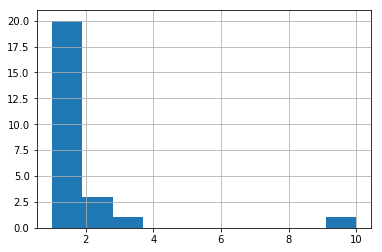

In [101]:
data = pd.Series(word_dict,name="Count")
print(data.value_counts())

%pylab inline
data.hist()


# Part 3. Simple regular expressions


"Regular expressions" are pieces of text that can be expressed in a regular form even if the characters are different. For example, when you encounter a URL on a webpage and right click on it, the browser knows that this is a URL and asks "open link in new tab". It does not need to know every URL, just what URLs are supposed to look like (that is they start with "HTTP://" or "HTTPS://"). 

This is not the place for a full discussion of the characters used in a regular expression. There exist tons of 'cheat sheets' online. But here are some basics:

- []: matches any character in the brackets
 - [abc] will match either 'a', 'b', or 'c'. [0-9] will match any digit. 
- \* matches zero or more characters. 
 - a\* will match one or more 'a' characters. [\w]\* will match zero or more word characters. 
- ? matches one non-whitespace (or user-defined) character. 
 - a? will match one 'a'. [0-9]? will match one digit.
- \+ matches one or more characters. 

In [ ]:
import re 

example_text = "1234\t3333\t10000\t1,500,442\t3.14"
print(example_text)

In [ ]:
# Just find the numbers
reg01 = re.compile("[0-9]")
print(reg01.findall(example_text))

In [ ]:
# Just find the numbers
reg01 = re.compile("[\s]*")
print(reg01.findall(example_text))

In [ ]:
# Hmm...it seems * matches 0 or more instances 
reg01 = re.compile("[0-9]+")
print(reg01.findall(example_text))

In [ ]:
# Let's deal with those commas
reg01 = re.compile("[\d,.]+")
print(reg01.findall(example_text))

As you can see from the above examples, working with regexs involve compiling a 'regular expression' and then applying that to text. Obviously, we could have just split on the tab character in this particular instance, but it's the logic of specifying regexs that's important, such as saying "all digits" or "one or more digits plus a comma." In the parentheses for the regular expression we can either ask for 0,1,n or a predetermined number of characters. The characters can be in a range, such as 0-9 or a-z. But we can also use escape codes for the characters. See below for examples of regexs with text.  

Lately, I've been using https://regex101.com/ to test regular expressions. It's very handy and thorough.

In [103]:
new_string = example_text.replace(",","")
print("Old string: ", example_text)
print("New string: ", new_string)

Old string:  1234	3333	10000	1,500,442	3.14
New string:  1234	3333	10000	1500442	3.14


In [104]:
example_text = "😱 hello everyone, are emojis too basic 😝😝😝 or am I just difficult 🙈? "
print(example_text)

😱 hello everyone, are emojis too basic 😝😝😝 or am I just difficult 🙈? 


In [105]:
import re 

reg02 = re.compile("[a-z]+")
print(reg02.findall(example_text))

['hello', 'everyone', 'are', 'emojis', 'too', 'basic', 'or', 'am', 'just', 'difficult']


In [106]:
import re 

reg02 = re.compile("\S+")
print(reg02.findall(example_text))

['😱', 'hello', 'everyone,', 'are', 'emojis', 'too', 'basic', '😝😝😝', 'or', 'am', 'I', 'just', 'difficult', '🙈?']


In [107]:
import re 
import pandas as pd 

reg02 = re.compile("[😱😝😈🎅🏾🙈]")
emojilist = reg02.findall(example_text)
print(emojilist)

emojiset = set(emojilist)
print(emojiset)

print(pd.Series(emojilist).value_counts())

['😱', '😝', '😝', '😝', '🙈']
{'😝', '😱', '🙈'}
😝    3
🙈    1
😱    1
dtype: int64


## Returning to the XML above with regex

Now that we have the text we can look through it for regularly formatted text. This is ideal for Wikipedia since it is a wiki. Wikis use regularly formatted text for all of its features, and Wikipedians are keen to make sure that the page is formatted properly. It should come as no surprise that MediaWiki itself uses a ton of regular expressions to parse the wiki text in the first place. 

In [108]:
import bs4 
infile = open("Canada.xml",'r')

wikitext = infile.read()

soup = bs4.BeautifulSoup(wikitext, "lxml")

text_to_parse = soup.mediawiki.page.text
re_inner_links = re.compile(r'\[\[.*?\]\]')
inner_links = re_inner_links.findall(text_to_parse)

# re_outer_links = re.compile(r'https?://[\w\./?&=%]*')
# outer_links = re_outer_links.findall(text_to_parse)

print("The program found %s wikilinks, of which %s are unique." % (len(inner_links),len(set(inner_links))))
print(pd.Series(inner_links).value_counts()[pd.Series(inner_links).value_counts() > 1])

The program found 948 wikilinks, of which 881 are unique.
[[Elizabeth II]]                                                   4
[[New France]]                                                     4
[[Toronto]]                                                        3
[[Julie Payette]]                                                  3
[[constitutional monarchy]]                                        3
[[Canadian Confederation|Confederation]]                           3
[[Justin Trudeau]]                                                 3
[[Governor General of Canada|Governor General]]                    3
[[United Kingdom]]                                                 3
[[Canadian Charter of Rights and Freedoms]]                        3
[[Ottawa]]                                                         3
[[First Nations]]                                                  2
[[maple leaf]]                                                     2
[[Statute of Westminster 1931|Statute of West